<a href="https://colab.research.google.com/github/itswwong/csm148-project/blob/main/CS148_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Set Explanation

Our team selected the Sleep Health and Lifestyle Dataset, which contains information about individuals’ demographics, daily habits, physical health, and sleep patterns.

## 2. Main Features

We are studying how Stress, Activity, Steps, HR, BP, BMI, Age, Gender, and Occupation affect Quality of Sleep.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

df = pd.read_csv('data/dataset.csv')

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 3. Data Cleaning

In [23]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Check for duplicate rows
duplicates = df.duplicated().sum()

In [16]:
# Replace "Normal Weight" with "Normal" in the original dataset
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [24]:
# Create copy for cleaning
df_clean = df.copy()

# Split blood pressure into systolic and diastolic
bp_split = df_clean['Blood Pressure'].str.split('/', expand=True)
df_clean['Systolic_BP'] = pd.to_numeric(bp_split[0])
df_clean['Diastolic_BP'] = pd.to_numeric(bp_split[1])

# 2. Create binary variables for sleep disorders
df_clean['Has_Sleep_Disorder'] = (df_clean['Sleep Disorder'] != 'None').astype(int)
df_clean['Has_Insomnia'] = (df_clean['Sleep Disorder'] == 'Insomnia').astype(int)
df_clean['Has_Sleep_Apnea'] = (df_clean['Sleep Disorder'] == 'Sleep Apnea').astype(int)

# 3. Create BMI numeric variable (for easier analysis)
bmi_mapping = {
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3
}
df_clean['BMI_Numeric'] = df_clean['BMI Category'].map(bmi_mapping)

# 4. Create age groups for better analysis
df_clean['Age_Group'] = pd.cut(df_clean['Age'],
                               bins=[0, 30, 40, 50, 100],
                               labels=['Young Adult', 'Adult', 'Middle Age', 'Senior'])

# 5. Create physical activity level categories
df_clean['Activity_Level'] = pd.cut(df_clean['Physical Activity Level'],
                                   bins=[0, 30, 60, 100],
                                   labels=['Low', 'Moderate', 'High'])

df_clean.describe()

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Has_Sleep_Disorder,Has_Insomnia,Has_Sleep_Apnea,BMI_Numeric
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.0,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733,1.0,0.205882,0.208556,1.449198
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611,0.0,0.404887,0.406821,0.549274
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000,1.0,0.000000,0.000000,1.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000,1.0,0.000000,0.000000,1.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000,1.0,0.000000,0.000000,1.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000,1.0,0.000000,0.000000,2.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000,1.0,1.000000,1.000000,3.000000


## 4. Exploratory Data Analysis (EDA)

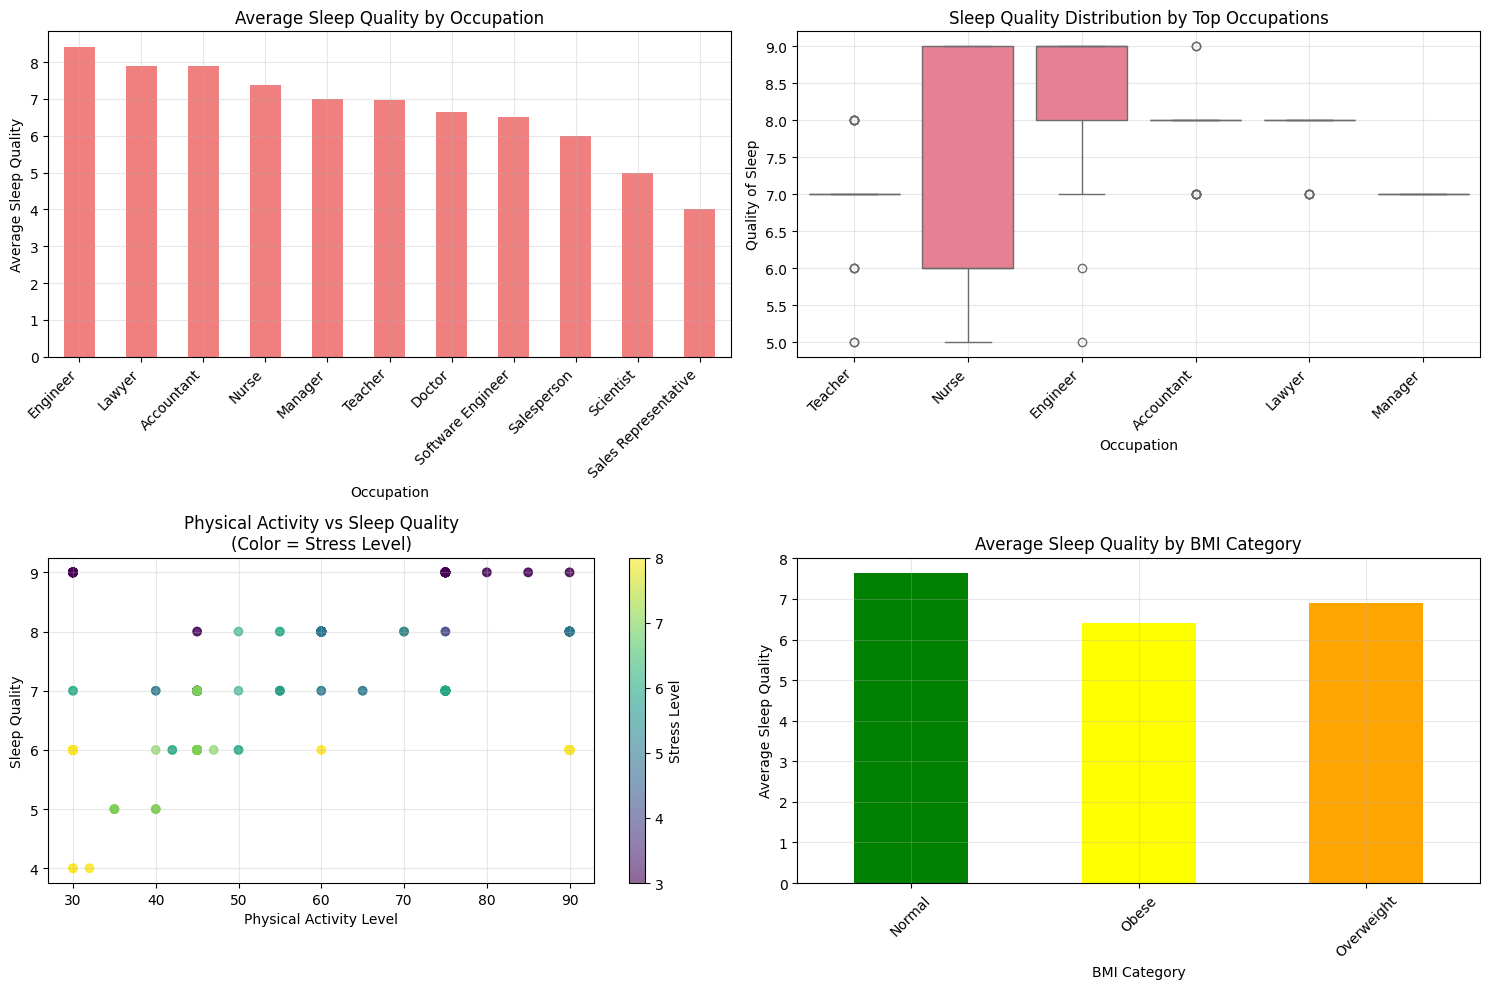

In [25]:
# Occupation and Sleep Quality Analysis
plt.figure(figsize=(15, 10))

# Top plot: Average sleep quality by occupation
plt.subplot(2, 2, 1)
occupation_sleep = df_clean.groupby('Occupation')['Quality of Sleep'].agg(['mean', 'count']).sort_values('mean', ascending=False)
occupation_sleep['mean'].plot(kind='bar', color='lightcoral')
plt.title('Average Sleep Quality by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Quality')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Bottom left: Sleep quality distribution by occupation
plt.subplot(2, 2, 2)
top_occupations = occupation_sleep.head(6).index
df_top_occ = df_clean[df_clean['Occupation'].isin(top_occupations)]
sns.boxplot(data=df_top_occ, x='Occupation', y='Quality of Sleep')
plt.title('Sleep Quality Distribution by Top Occupations')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Bottom right: Physical health vs sleep quality
plt.subplot(2, 2, 3)
plt.scatter(df_clean['Physical Activity Level'], df_clean['Quality of Sleep'],
           alpha=0.6, c=df_clean['Stress Level'], cmap='viridis')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Quality')
plt.title('Physical Activity vs Sleep Quality\n(Color = Stress Level)')
plt.colorbar(label='Stress Level')
plt.grid(True, alpha=0.3)

# Bottom right: BMI vs sleep quality
plt.subplot(2, 2, 4)
bmi_sleep = df_clean.groupby('BMI Category')['Quality of Sleep'].mean()
bmi_sleep.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Average Sleep Quality by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Sleep Quality')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical analysis of occupation effects
from scipy.stats import f_oneway

occupations = df_clean['Occupation'].unique()
occupation_groups = [df_clean[df_clean['Occupation'] == occ]['Quality of Sleep'].values
                    for occ in occupations]

f_stat, p_value = f_oneway(*occupation_groups)